# Importing libraries and Loading Data

In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('automobileEDA.csv')

# finding null value and replacing it with median

In [3]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    1
diesel               0
gas                  0
dtype: int64

In [4]:
df['stroke']=df['stroke'].fillna(3.29)

# Finding Data Type of dataframe

In [5]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

# converting categorical feature indicator variables.

In [6]:
dfd = pd.get_dummies(df['body-style'])
dfd1 = pd.get_dummies(df['engine-type'])
data = pd.concat([df,dfd,dfd1],axis = 1)
dfda =pd.get_dummies(data['aspiration'])
data = pd.concat([data,dfda],axis = 1)
dfdp =pd.get_dummies(data['num-of-cylinders'])
data = pd.concat([data,dfdp],axis = 1)

# creating axis

In [7]:
z = data[["horsepower","engine-size","convertible","hardtop","hatchback","sedan","wagon","curb-weight","highway-mpg","diesel","gas","city-L/100km",'dohc', 'l', 'ohc', 'ohcf','ohcv', 'rotor',"stroke","city-mpg","std","turbo",'eight', 'five', 'four', 'six',
       'three', 'twelve', 'two']]
Y = df[['price']]

# splitting data into test,train

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(z, Y, test_size = 0.25, random_state = 5)

# Simple Linear Regression Model

In [9]:
lm = LinearRegression(normalize=True)
lm.fit(X_train, Y_train)
Y_pred = lm.predict(X_test)

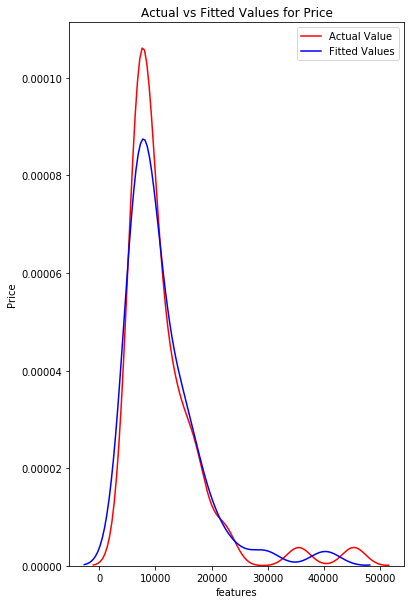

r2_score: 0.8964169784453542
mean_squared_error: 5479507.588629008
median_absolute_error 1123.6065835816898


In [10]:
plt.figure(figsize=(6, 10))
ax1 = sns.distplot(Y_test, hist=False, color="r", label="Actual Value")
sns.distplot(Y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('features')
plt.ylabel('Price')
plt.show()
plt.close()
print("r2_score:",r2_score(Y_test, Y_pred))
print("mean_squared_error:",mean_squared_error(Y_test, Y_pred))
print("median_absolute_error",median_absolute_error(Y_test, Y_pred))

# Using Ridge Regression with alpha=0.1

In [11]:
pr=PolynomialFeatures(degree=2)
X_train_pr=pr.fit_transform(X_train)
X_test_pr=pr.fit_transform(X_test)
RigeModel=Ridge(alpha=0.1)
RigeModel.fit(X_train_pr, Y_train)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:189: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [12]:
y_ridge = RigeModel.predict(X_test_pr)

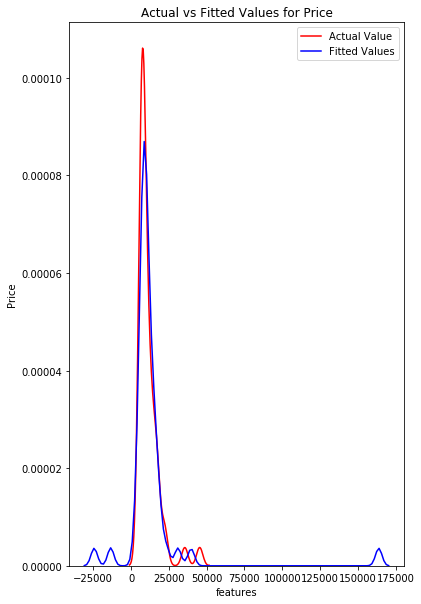

r2_score: -10.623059059245788
mean_squared_error: 614855980.8580317
median_absolute_error 2725.454749140743


In [13]:
plt.figure(figsize=(6, 10))
ax1 = sns.distplot(Y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_ridge, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('features')
plt.ylabel('Price')
plt.show()
plt.close()
print("r2_score:",r2_score(Y_test, y_ridge))
print("mean_squared_error:",mean_squared_error(Y_test, y_ridge))
print("median_absolute_error",median_absolute_error(Y_test, y_ridge))

# Using Pipelining and Ridge Regression with alpha=0.1

In [14]:
inp = [('scale',StandardScaler()),('poly',PolynomialFeatures(degree = 2,include_bias = False)),('model',Ridge())]

In [15]:
pipe = Pipeline(inp)
pipe.fit(X_train,Y_train)
y_pipe_pred_ = pipe.predict(X_test)

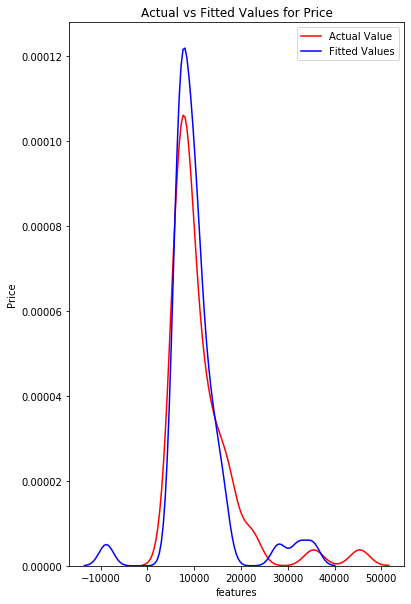

r2_score: 0.7380262182591362
mean_squared_error: 13858326.427691652
median_absolute_error 1283.2481358653968


In [16]:
plt.figure(figsize=(6, 10))
ax1 = sns.distplot(Y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pipe_pred_, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('features')
plt.ylabel('Price')
plt.show()
plt.close()
print("r2_score:",r2_score(Y_test, y_pipe_pred_))
print("mean_squared_error:",mean_squared_error(Y_test, y_pipe_pred_))
print("median_absolute_error",median_absolute_error(Y_test, y_pipe_pred_))

# Using Grid Search and Ridge Regression

In [17]:
parameters1=[{"alpha":[0.001,0.01,0.1,1,10,100,1000,10000]}]
RR=Ridge()
Grid1=GridSearchCV(RR,parameters1,cv=4)
Grid1.fit(X_train_pr,Y_train)
br=Grid1.best_estimator_
scores=Grid1.cv_results_
scores['mean_test_score']
print(br)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:189: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:189: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:189: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:189: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_mod

Ridge(alpha=10000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [18]:
RigeModel=Ridge(alpha=10000)
RigeModel.fit(X_train_pr, Y_train)
y_GRIDridge = RigeModel.predict(X_test_pr)

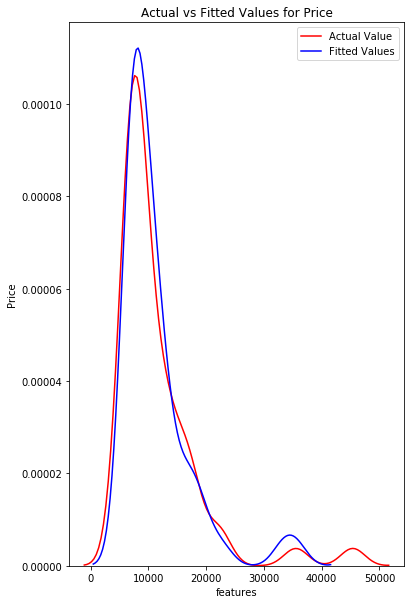

r2_score: 0.9084125428015758
mean_squared_error: 4844946.200736613
median_absolute_error 892.9416382584768


In [19]:
plt.figure(figsize=(6, 10))
ax1 = sns.distplot(Y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_GRIDridge, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('features')
plt.ylabel('Price')
plt.show()
plt.close()
print("r2_score:",r2_score(Y_test, y_GRIDridge))
print("mean_squared_error:",mean_squared_error(Y_test, y_GRIDridge))
print("median_absolute_error",median_absolute_error(Y_test, y_GRIDridge))


# Conclusion:
After using grid search we found the best alpha value for fitting Linear Regression model using Ridge Regression.
Final graph shows good test result as actual and prdicted graph are almost overlapping each other

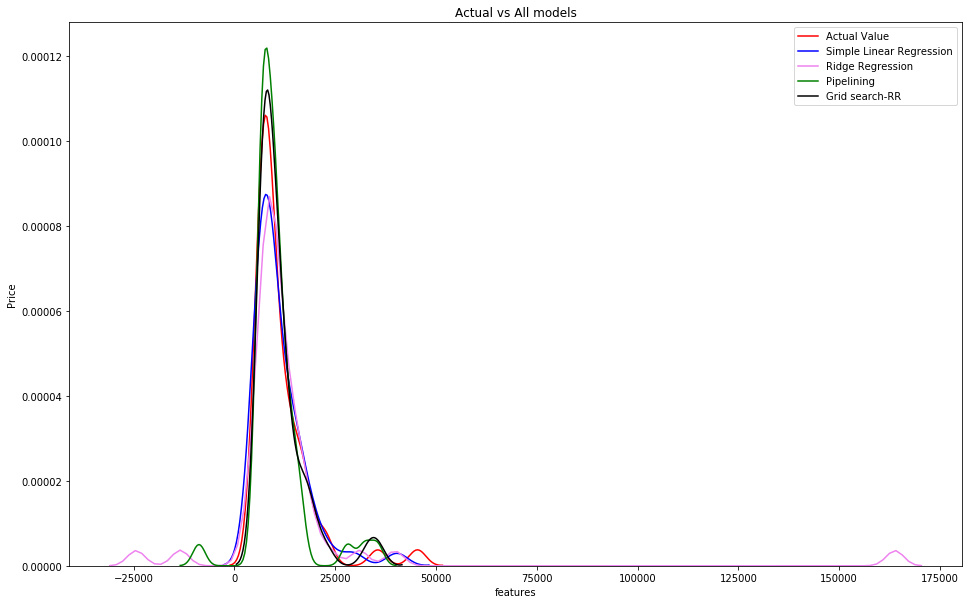

In [20]:
plt.figure(figsize=(16, 10))
ax1 =sns.distplot(Y_test, hist=False, color="r", label="Actual Value")
sns.distplot(Y_pred, hist=False, color="b", label="Simple Linear Regression" , ax=ax1)
sns.distplot(y_ridge, hist=False, color="violet", label="Ridge Regression" , ax=ax1)
sns.distplot(y_pipe_pred_, hist=False, color="g", label="Pipelining" , ax=ax1)
sns.distplot(y_GRIDridge, hist=False, color="black", label="Grid search-RR" , ax=ax1)
plt.title('Actual vs All models')
plt.xlabel('features')
plt.ylabel('Price')
plt.show()
plt.close()

# Code By:-
Rishabh Gaur
And
Shashwat Shah